## install and import all required packages

In [1]:
!pip install mapie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the data and split it into training and testing sets

### 1st dataset

In [5]:
df = pd.read_csv('drive/MyDrive/Test_Data_CSV.csv')
df.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.9
1,1,0.361690,54.986671,0.2,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.8
2,1,0.000000,55.424786,0.3,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.7
3,1,2.622251,55.524146,0.4,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.6
4,1,3.888165,55.852018,0.5,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.5


In [64]:
df["Data_No"].value_counts()

29    2581
18    2579
49    2482
28    2438
30    1939
17    1934
31    1600
19    1457
14    1190
13    1151
8     1145
23    1145
11    1090
15     949
32     786
33     785
20     719
6      713
35     660
12     623
38     620
4      608
27     602
7      593
3      564
16     553
50     524
41     499
22     466
9      450
24     431
10     408
42     403
26     401
1      366
34     330
5      329
39     314
25     311
36     302
48     286
2      282
37     278
45     272
47     258
44     240
21     239
40     194
43     175
46     150
Name: Data_No, dtype: int64

In [ ]:
len(df)

39414

In [13]:
#X = df[df.columns[1 : -2]]
#y = df["RUL"]

In [6]:
train = df[df["Data_No"]<=45]
test = df[df["Data_No"]>45]

In [16]:
len(test)

457

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.1)


In [18]:
train.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.9
1,1,0.361690,54.986671,0.2,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.8
2,1,0.000000,55.424786,0.3,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.7
3,1,2.622251,55.524146,0.4,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.6
4,1,3.888165,55.852018,0.5,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.5


In [7]:
X_train = train[["Data_No", "Differential_pressure", "Flow_rate",	"Dust_feed"]]
y_train = train["RUL"]

In [8]:
X_test = test[["Data_No", "Differential_pressure", "Flow_rate",	"Dust_feed"]]
y_test = test["RUL"]

In [26]:
X_train.head()

,Data_No,Differential_pressure,Flow_rate,Dust_feed
0,1,0.271267,52.281993,236.428943
1,1,0.361690,54.986671,236.428943
2,1,0.000000,55.424786,236.428943
3,1,2.622251,55.524146,236.428943
4,1,3.888165,55.852018,236.428943


In [27]:
y_train.head()

0    58.9
1    58.8
2    58.7
3    58.6
4    58.5
Name: RUL, dtype: float64

In [75]:
print(len(train))
print(len(test))

35714
3700


### 2nd dataset

In [4]:
df_2 = pd.read_csv('drive/MyDrive/Second_dataset_rul.csv')
len(df_2)

166441

In [51]:
df_2.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [27]:
#df_2 = df_2.sample(n=5000, random_state=1)

In [5]:
df_2 = df_2[(df_2["timestamp"]<"2018-05-01 00:00:00") & (df_2["timestamp"]>="2018-04-01 00:00:00")]

In [ ]:
#df_2['timestamp'] = pd.to_datetime(df_2['timestamp']).values.astype(float)

In [ ]:
#X_2 = df_2[df_2.columns[2 : -1]]
#y_2 = df_2["rul"]

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train_2, X_test_2, y_train_2, y_test_2   = train_test_split(X_2, y_2, test_size=0.1)

In [35]:
train_2 = df_2[df_2["timestamp"]<"2018-04-26 00:00:00"]
test_2 = df_2[df_2["timestamp"]>="2018-04-26 00:00:00"]

In [36]:
X_train_2 = train_2[train_2.columns[2 : -1]]
y_train_2 = train_2["rul"]

In [37]:
X_test_2 = test_2[test_2.columns[2 : -1]]
y_test_2 = test_2["rul"]

In [32]:
test_2

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
36000,36000,2018-04-26 00:00:00,2.510648,46.918400,54.340270,43.663190,622.3380,92.63443,13.34635,16.21094,...,38.281250,52.34375,39.631871,37.905094,41.087960,46.875000,104.74540,53.819440,192.7083,555.300000
36001,36001,2018-04-26 00:01:00,2.510648,46.918400,54.340270,43.663190,622.3380,92.63443,13.34635,16.21094,...,38.281250,52.34375,39.631871,37.905094,41.087960,46.875000,104.74540,53.819440,192.7083,555.283333
36002,36002,2018-04-26 00:02:00,2.503762,46.961800,54.340270,43.663193,639.3518,91.92503,13.46933,16.13136,...,38.020830,52.60416,39.641200,37.905090,41.087963,47.453700,106.77080,53.530090,192.1296,555.266667
36003,36003,2018-04-26 00:03:00,2.510648,46.961803,54.991320,43.663190,631.0185,93.66400,13.41146,16.16753,...,38.020830,52.34375,40.798610,38.194440,41.087963,46.875000,112.55790,53.530090,191.5509,555.250000
36004,36004,2018-04-26 00:04:00,2.500810,46.961803,54.296870,43.619790,628.3564,92.31725,13.44763,16.13136,...,37.760410,52.34375,41.666670,38.194440,41.087960,46.585648,118.92360,52.662040,192.1296,555.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,43195,2018-04-30 23:55:00,2.453588,44.965275,50.434020,41.319440,633.7963,71.82919,13.65017,15.63223,...,30.989580,39.58333,38.773150,34.722220,37.326390,37.615742,62.21065,45.138889,169.2708,435.383333
43196,43196,2018-04-30 23:56:00,2.453588,44.965275,50.434025,41.319443,625.9259,73.48293,13.59954,15.62500,...,30.468750,39.32291,37.905090,34.722220,36.747680,37.615742,61.05324,44.849540,168.1134,435.366667
43197,43197,2018-04-30 23:57:00,2.455556,44.965275,50.434025,41.319443,630.6713,77.00027,13.64294,15.66117,...,30.468748,39.58333,37.615742,34.432870,36.747684,37.615742,59.89583,44.849540,166.9560,435.350000
43198,43198,2018-04-30 23:58:00,2.454572,44.965275,50.434020,41.319443,632.0602,75.79302,13.59954,15.66117,...,30.468748,39.06250,36.747680,34.432870,36.747680,37.905090,58.15972,44.560180,163.4838,435.333333


In [ ]:
test_2[["timestamp", "rul"]].plot.line()

## Models and conformal predictions

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

def random_forest(X_train, y_train, X_test):
  regr = RandomForestRegressor(max_depth=2, random_state=0)
  model = regr.fit(X_train, y_train)

  Y_pred = regr.predict(X_test)

  return model

In [39]:
from sklearn.svm import SVR
def svr(X_train, y_train, X_test):
  svr = SVR().fit(X_train, y_train)
  yfit = svr.predict(X_test)
  return svr


In [40]:
from mapie.regression import MapieRegressor

def conformal_prediction(model, a, X_train, y_train, X_test):
  mapie = MapieRegressor(estimator=model)
  mapie_reg = mapie.fit(X_train, y_train)
  y_pred, y_pis = mapie_reg.predict(X_test, alpha=a)

  return y_pred, y_pis

## Plotting functions

In [14]:
import matplotlib.pyplot as plt

def plot_without_cp(y_test, y_pred):
  x = np.arange(1,len(y_pred)+1)

  plt.figure(figsize=(18,6))

  plt.plot(x,y_pred)
  plt.plot(x,y_test)
  plt.xlabel('test set')
  plt.ylabel('RUL')
  plt.title('Predictive maintenance RUL of test set')
  plt.legend(["prediction","true"])
  plt.grid(True)
  plt.show()

In [41]:
def plot_with_cp(y_test, y_pred, y_pis, confidence):
  x = np.arange(1,len(y_pred)+1)

  plt.figure(figsize=(18,6))

  plt.plot(x,y_pred)
  plt.plot(x,y_test)

  #plt.plot(x[0:100],y_pis[:,0][0:100])
  #plt.plot(x[0:100],y_pis[:,1][0:100])

  plt.fill_between(x, y_pis[:,0].flatten(), y_pis[:,1].flatten(), alpha=0.2, color='tab:green')

  plt.xlabel('test set')
  plt.ylabel('RUL')
  plt.title('Predictive maintenance RUL with confidence of ' + confidence +'%')
  plt.legend(["prediction","true",confidence + "% confidence interval"])
  plt.grid(True)
  plt.show()

## Random forest

### 1st dataset

In [69]:
rf_model = random_forest(X_train, y_train, X_test)

In [70]:
y_pred_rf, y_pis_rf = conformal_prediction(rf_model,0.1, X_train, y_train, X_test)

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.8563274159481669

In [72]:
y_pred_rf

array([51.56220932, 51.56220932, 51.56220932, ..., 39.02688674,
       39.02688674, 39.02688674])

In [73]:
y_test

35714    27.1
35715    27.0
35716    26.9
35717    26.8
35718    26.7
         ... 
39409     8.2
39410     8.1
39411     8.0
39412     7.9
39413     7.8
Name: RUL, Length: 3700, dtype: float64

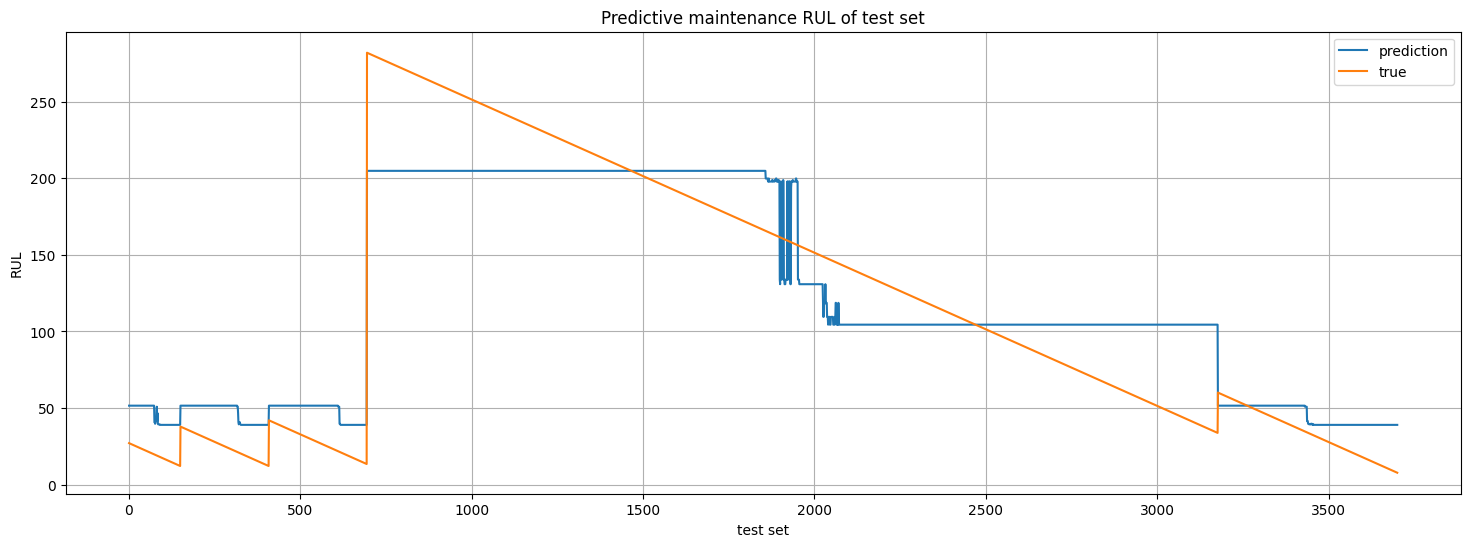

In [81]:
plot_without_cp(y_test, y_pred_rf)

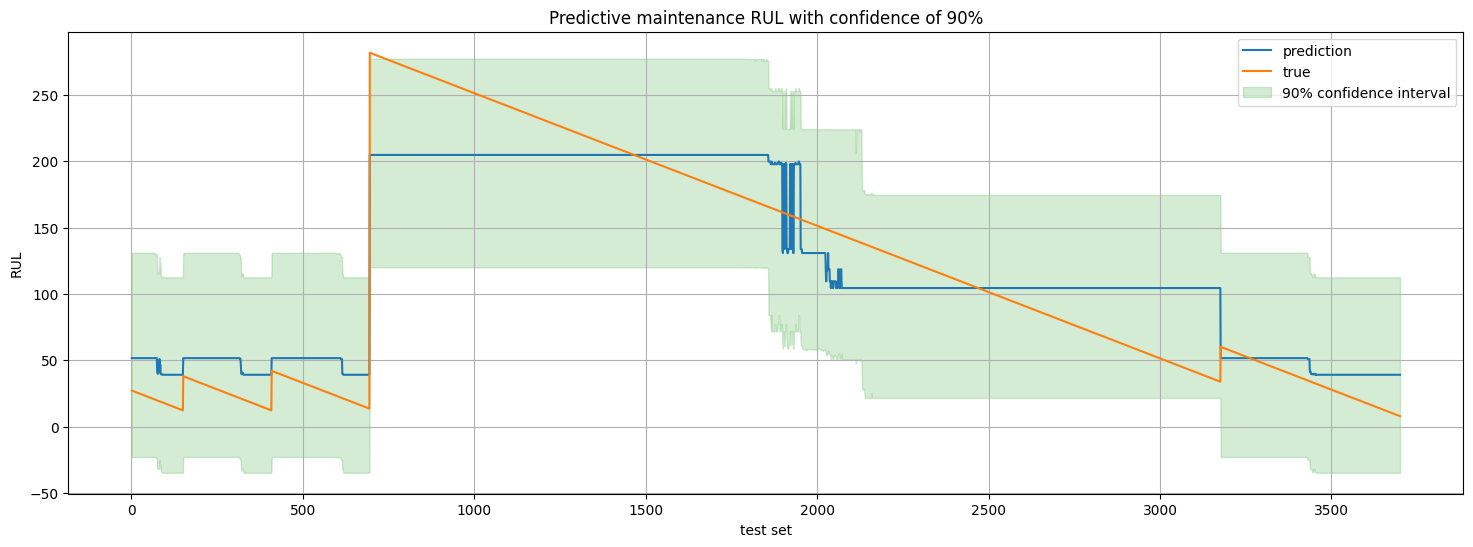

In [83]:
plot_with_cp(y_test, y_pred_rf, y_pis_rf, "90")

### 2nd dataset

In [49]:
rf_model_2 = random_forest(X_train_2, y_train_2, X_test_2)

In [50]:
y_pred_rf_2, y_pis_rf_2 = conformal_prediction(rf_model_2,0.1, X_train_2, y_train_2, X_test_2)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test_2, y_pred_rf_2)

-105.72885803629232

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_2, y_pred_svr_2)

44521.083463296956

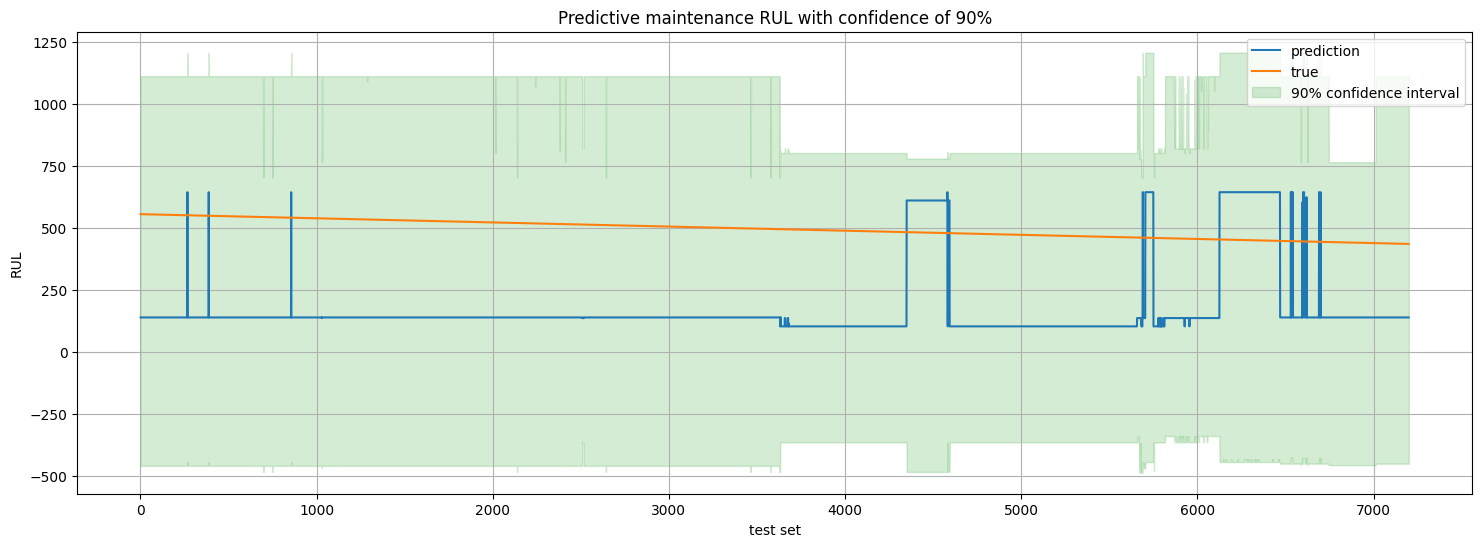

In [52]:
plot_with_cp(y_test_2, y_pred_rf_2, y_pis_rf_2, "90")

## SVR

### 1st dataset

In [14]:
svr_model = svr(X_train, y_train, X_test)

In [15]:
y_pred_svr, y_pis_svr = conformal_prediction(svr_model,0.1,X_train, y_train, X_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_svr)

0.9438302547870646

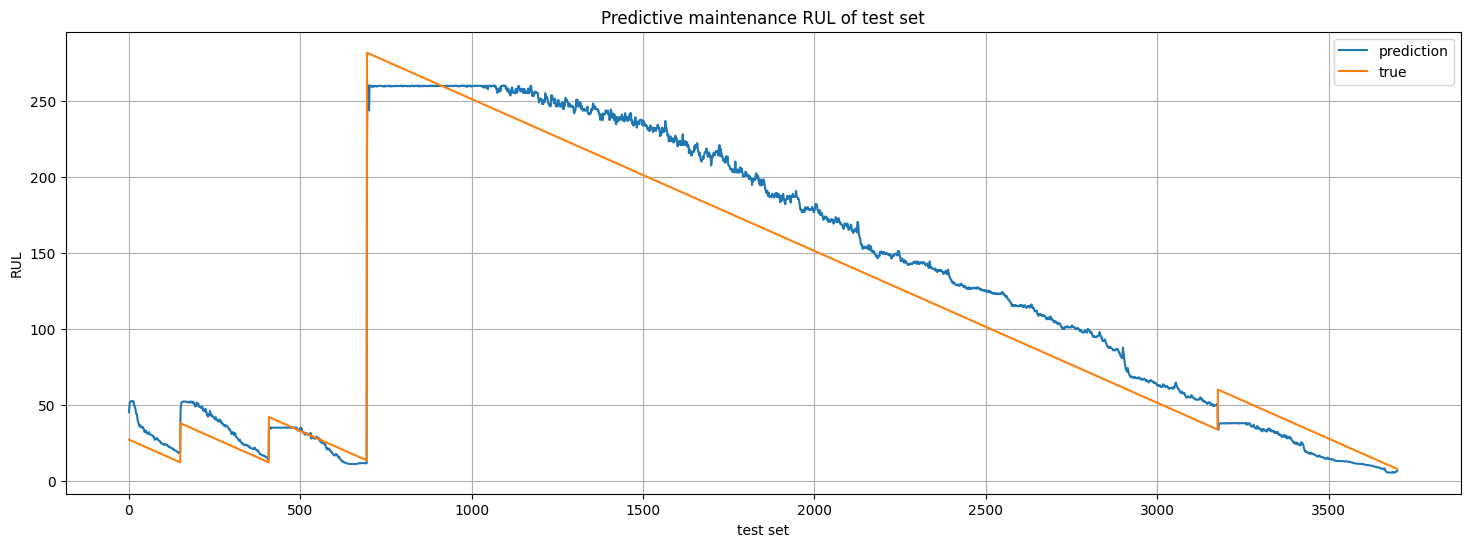

In [17]:
plot_without_cp(y_test, y_pred_svr)

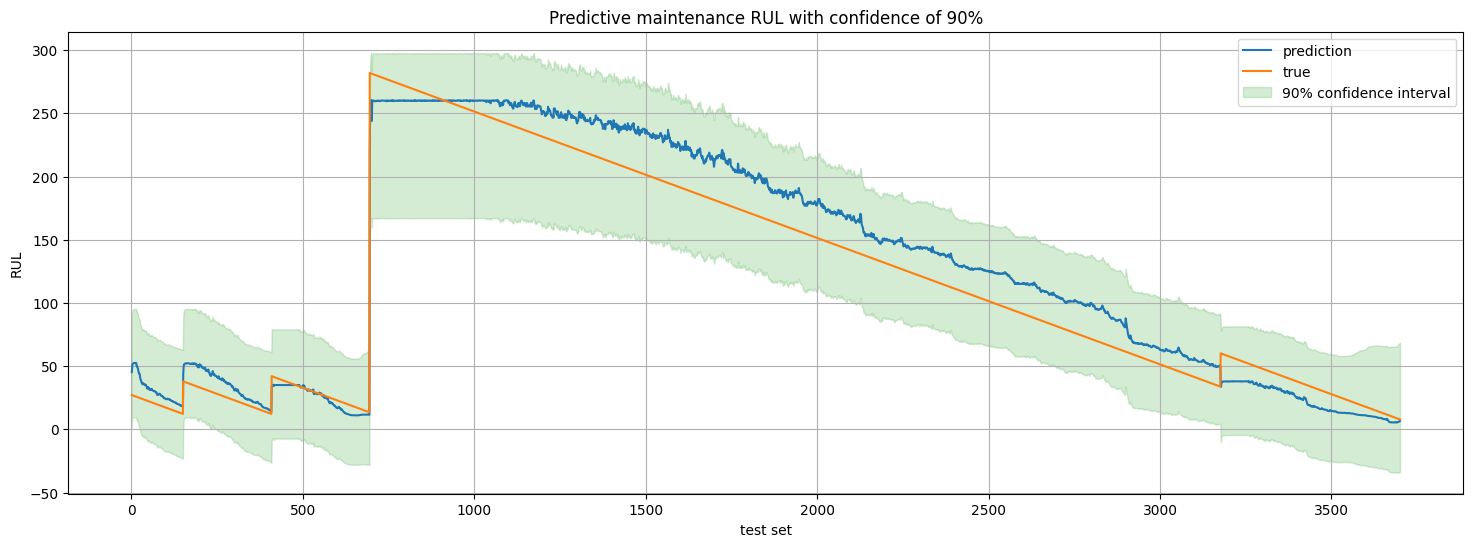

In [18]:
plot_with_cp(y_test, y_pred_svr, y_pis_svr, "90")

### 2nd dataset

In [42]:
svr_model_2 = svr(X_train_2, y_train_2, X_test_2)

In [43]:
y_pred_svr_2, y_pis_svr_2 = conformal_prediction(svr_model_2,0.1,X_train_2, y_train_2, X_test_2)

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test_2, y_pred_svr_2)

-36.1009036017618

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_2, y_pred_svr_2)

44521.083463296956

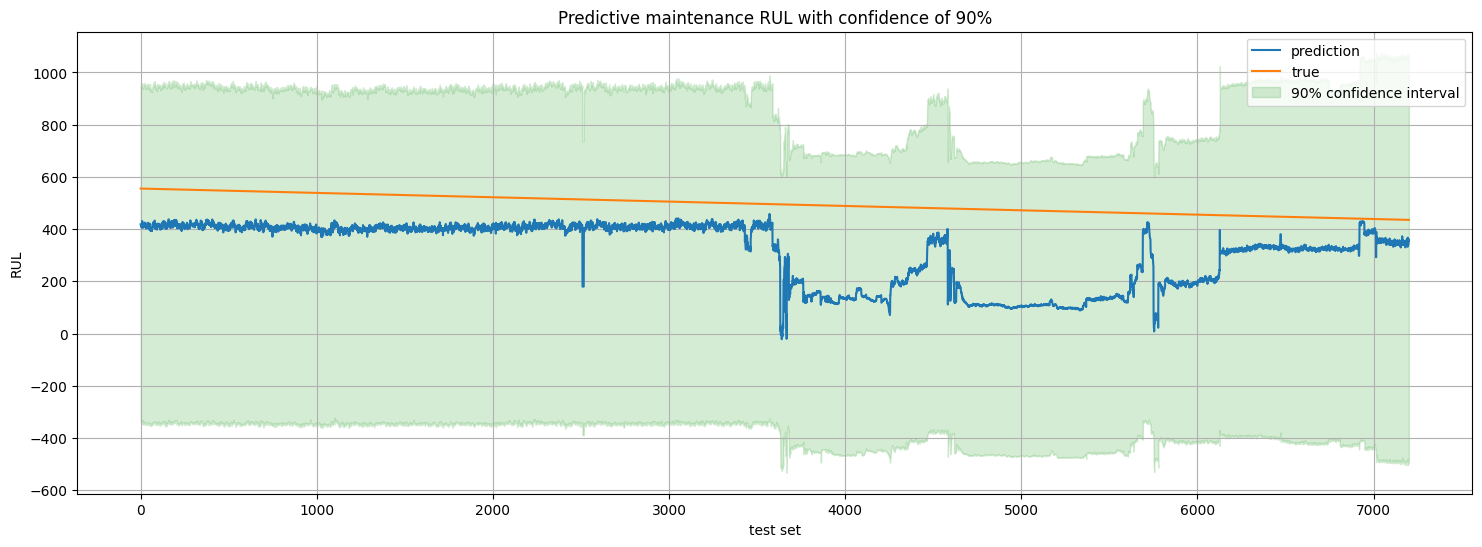

In [46]:
plot_with_cp(y_test_2, y_pred_svr_2, y_pis_svr_2, "90")